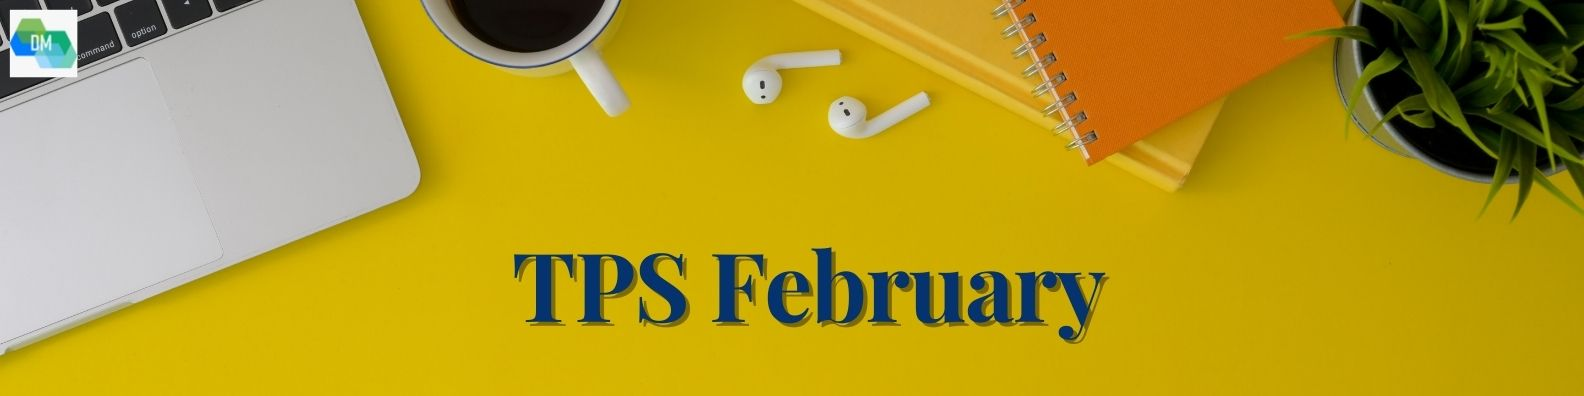

**Observations on this TPS dataset:**
- `target` column is the target variable which consists of 10 kinds of bacteria `Streptococcus_pyogenes`,`Salmonella_enterica`,`Enterococcus_hirae`,
`Escherichia_coli`,`Campylobacter_jejuni`,`Streptococcus_pneumoniae`,
`Staphylococcus_aureus`,`Escherichia_fergusonii`,`Bacteroides_fragilis`,`Klebsiella_pneumoniae`

- `Train` dataset has `200,000` rows and `288` columns which contains`286` features, `1` target variable `target` and `1` column of `row_id`
- `Test` dataset has `100,000` rows and `287` columns which contains`286` features with`1` column of `row_id`
- No missing values in train and test dataset

<h3 style="font-family: Arial;background-color:#9ef01a;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
from scipy.stats import mode
import warnings
warnings.filterwarnings('ignore')
from time import time
t0 = time()
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

<h3 style="font-family: Arial;background-color:#9ef01a;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Importing & Reading the dataset 📝 </centre></strong></h3>

In [ ]:
df_train = pd.read_csv("../input/tabular-playground-series-feb-2022/train.csv")
df_test = pd.read_csv("../input/tabular-playground-series-feb-2022/test.csv")
df_subm = pd.read_csv("../input/tabular-playground-series-feb-2022/sample_submission.csv")

In [ ]:
#Custom Color Palette 🎨
custom_colors = ["#201E1F","#FF4000","#FAAA8D","#FEEFDD","#50B2C0"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size=1.2)
plt.tick_params(axis='both', labelsize=0, length = 0)

In [ ]:
df_train_row_count, df_train_column_count = df_train.shape
print('Total number of rows:', df_train_row_count)
print('Total number of columns:', df_train_column_count)

In [ ]:
df_test_row_count, df_test_column_count = df_test.shape
print('Total number of rows:', df_test_row_count)
print('Total number of columns:', df_test_column_count)

In [ ]:
df_train.head()

In [ ]:
df_train.describe().T

In [ ]:
df_train.info()

In [ ]:
df_test.describe().T

<h3 style="font-family: Arial;background-color:#9ef01a;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Checking for missing values ✏️ </centre></strong></h3>

In [ ]:
df_train.isna().sum()

In [ ]:
df_test.isna().sum()

In [ ]:
print ("Unique values are:\n",df_train.nunique())

In [ ]:
target_class = pd.DataFrame({'count': df_train.target.value_counts(),
                             'percentage': df_train['target'].value_counts() / df_train.shape[0] * 100
})

In [ ]:
target_class

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Pie(values = target_class['count'],labels = target_class.index,hole = 0.6, 
                     hoverinfo ='label+percent'))
fig.update_traces(textfont_size = 12, hoverinfo ='label+percent',textinfo='label', 
                  showlegend = False,marker = dict(colors =["#201E1F","#FF4000","#FAAA8D","#FEEFDD","#50B2C0",
                                                            "#390099","#9e0059","#ff0054","#38B000","#ffbd00"]),
                  title = dict(text = 'Target Distribution'))  
fig.show()

In [ ]:
# Dropping not necessary Id column
df_train.drop(columns ='row_id',inplace=True)
df_test.drop(columns ='row_id',inplace=True)

In [ ]:
categorical = df_train.columns[df_train.dtypes == "object"].to_numpy()
numerical = df_train.columns[df_train.dtypes != "object"].to_numpy()

In [ ]:
#Visualizing first few rows
fig = plt.figure(figsize=(20, 50))
rows, cols = 10, 4
for idx, num in enumerate(numerical[:40]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ='#50B2C0',linewidth=0.6, data = df_train, label = "Train")
    sns.kdeplot(x = num, fill = True,color ='#FF4000',linewidth=0.6, data = df_test, label = "Test")      
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

In [ ]:
plt.figure(figsize = (11,11))
corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, cmap = custom_colors, robust = True, center = 0,square = True, linewidths =.6)
plt.title('Correlation')
plt.show()

In [ ]:
#Defining X and y
X = df_train.drop(['target'], axis = 1)
y = df_train['target']

<h3 style="font-family: Arial;background-color:#9ef01a;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Dataset split for prediction </centre></strong></h3>

In [ ]:
# creating dataset split for prediction
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state = 42) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(y)

<h3 style="font-family: Arial;background-color:#9ef01a;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>XGBoost Classifier ✏️ </centre></strong></h3>

In [ ]:
# 1. Using XGBoost Classifier
import xgboost as xgb
from xgboost import XGBClassifier
model1 = XGBClassifier(random_state = 42,n_estimators = 1000,learning_rate = 0.05,eval_metric ="auc",
                      max_depth = 8,booster ='gbtree',verbosity=0,tree_method = 'gpu_hist',task_type ="GPU")
model1.fit(X,y)

In [ ]:
predicted1 = model1.predict(X)

In [ ]:
m1_cm = confusion_matrix(y, predicted1)
m1_acc_score = accuracy_score(y, predicted1)
print("Confusion Matrix")
print(m1_cm)
sns.heatmap(m1_cm, annot=True,cmap=custom_colors)
print("\n")
print("Accuracy of XGBoost:",round(m1_acc_score*100,2),'\n')
print(classification_report(y,predicted1))

In [ ]:
y_pred1 = model1.predict(df_test)

In [ ]:
df_imp = pd.DataFrame({'feature': X_train.columns, 'importance': model1.feature_importances_})
plt.figure(figsize = (12,7))
sns.barplot(x="importance", y="feature", data = df_imp.sort_values(by ="importance", ascending = False).iloc[:20],
           palette = custom_colors)
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

In [ ]:
y_pred1 = enc.inverse_transform(y_pred1)
df_subm['target'] = y_pred1
df_subm.to_csv('submission_xgb.csv', index = False)

In [ ]:
df_subm

<h3 style="font-family: Arial;background-color:#9ef01a;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Random Forest Classifier ✏️ </centre></strong></h3>

In [ ]:
# 2. Using Random Forest Classifier
t0 = time()
# Load random forest classifier 
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier
model2 = RandomForestClassifier(n_estimators = 500,n_jobs = -1, random_state = 42)

# Train the Classifier/fitting the model
model2.fit(X_train, y_train)

# predict the response
y_pred = model2.predict(X_test)
acc_rf = round(model2.score(X_test,y_test) * 100, 2)
rf_time = (round(time() - t0, 3))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', rf_time)

#Print Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot = True,cmap = custom_colors)

In [ ]:
y_pred2 = model2.predict(df_test)

In [ ]:
df_subm = df_subm.drop(["target"],axis = 1)

In [ ]:
sub = pd.DataFrame(y_pred2,columns =["target"])

In [ ]:
submission = pd.concat([df_subm,sub],axis = 1)
submission

In [ ]:
submission.to_csv("submission_rf.csv",index = False)

<h3 style="font-family: Arial;background-color:#9ef01a;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Extra Trees Classifier ✏️ </centre></strong></h3>

In [ ]:
# 3. Using Extra Trees Classifier
t0 = time()
# Load Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# Create a Extra Trees Classifier
model3 = ExtraTreesClassifier(n_estimators = 2000, n_jobs = -1, random_state = 42)

# Train the Classifier/fitting the model
model3.fit(X_train, y_train)

# predict the response
y_pred = model3.predict(X_test)
acc_rf = round(model3.score(X_test,y_test) * 100, 2)
rf_time = (round(time() - t0, 3))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("Extra Trees Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', rf_time)

#Print Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot = True,cmap = custom_colors)

In [ ]:
y_pred3 = model3.predict(df_test)

In [ ]:
df_imp = pd.DataFrame({'feature': X_train.columns, 'importance': model3.feature_importances_})
plt.figure(figsize = (12,7))
sns.barplot(x="importance", y="feature", data = df_imp.sort_values(by ="importance", ascending = False).iloc[:20],
           palette = custom_colors)
plt.title("ExtraTrees Feature Importance")
plt.tight_layout()
plt.show()

In [ ]:
sub1 = pd.DataFrame(y_pred3, columns =["target"])

In [ ]:
submission = pd.concat([df_subm,sub1],axis = 1)
submission

In [ ]:
submission.to_csv("submission_etr.csv",index = False)

<h3 style="font-family: Arial;background-color:#9ef01a;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>If you found this notebook useful, please Upvote. Thanks!  </centre></strong></h3>